## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew, stats
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,f1_score

## Data Import

In [2]:
data = pd.read_csv("datasets_26475_38092_insurance2.csv")
data

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


## Exploratory Data Analysis

### Gender counts

In [3]:
female = int (data.sex.value_counts()[0])
print (data.sex.value_counts())
print ("Prob Male: %.3f,\tProb Female: %.3f" % (1-(female/1338), (female/1338)))

1    676
0    662
Name: sex, dtype: int64
Prob Male: 0.505,	Prob Female: 0.495


### Smoker statistics

In [4]:
non_smoker = data.smoker.value_counts()[0]
print (data.smoker.value_counts())
print ("Prob Non-smoker: %.3f,\tProb smoker: %.3f" % ((non_smoker/1338), 1-(non_smoker/1338)))

0    1064
1     274
Name: smoker, dtype: int64
Prob Non-smoker: 0.795,	Prob smoker: 0.205


### BMI data statistics

In [5]:
underweight = data.bmi.between(0,18.499999, inclusive=True).value_counts()[True]
normal = data.bmi.between(18.5, 24.999, inclusive=True).value_counts()[True]
overweight = data.bmi.between(25, 29.99999, inclusive=True).value_counts()[True]
obese = data.bmi.between(30, 10000, inclusive=True).value_counts()[True]
# print (underweight, normal, overweight, obese)
print ("underweight: \t%d,\t%.3f" % (underweight, underweight/1338))
print ("normal: \t%d,\t%.3f" % (normal, normal/1338))
print ("overweight: \t%d,\t%.3f" % (overweight, overweight/1338))
print ("obese: \t\t%d,\t%.3f" % (obese, obese/1338))

underweight: 	20,	0.015
normal: 	225,	0.168
overweight: 	386,	0.288
obese: 		707,	0.528


### Age stats

In [6]:
underage = data.age.between(0,17.999, inclusive=True).value_counts().get(True, 0)
adult = data.age.between(18, 39.999, inclusive=True).value_counts().get(True, 0)
overadult = data.age.between(40, 59.999, inclusive=True).value_counts().get(True, 0)
old = data.age.between(60, 200, inclusive=True).value_counts().get(True, 0)
print ("0-18: \t%d,\t%.3f" % (underage, underage/1338))
print ("18-40: \t%d,\t%.3f" % (adult, adult/1338))
print ("40-60: \t%d,\t%.3f" % (overadult, overadult/1338))
print ("60-: \t%d,\t%.3f" % (old, old/1338))

0-18: 	0,	0.000
18-40: 	674,	0.504
40-60: 	550,	0.411
60-: 	114,	0.085


### Summary Statistics

In [7]:
data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [8]:
print("skew:  {}".format(skew(data)))

skew:  [ 0.05561008 -0.0209279   0.28372857  0.93732812  1.46312353 -0.03805778
  1.51417971 -0.34586568]


In [9]:
print("kurtosis:  {}".format(kurtosis(data)))

kurtosis:  [-1.24492068 -1.99956202 -0.05502311  0.19721743  0.14073048 -1.32722658
  1.59582136 -1.88037693]


In [10]:
print("missing data values: \n{} ".format(data.isnull().sum()))

missing data values: 
age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64 


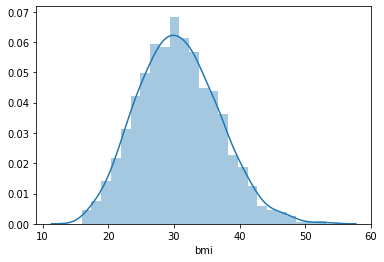

In [11]:
sns.distplot(data['bmi'])

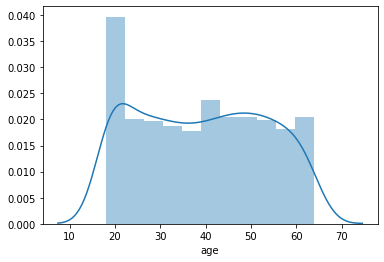

In [12]:
sns.distplot(data['age'])  # Distribution of age

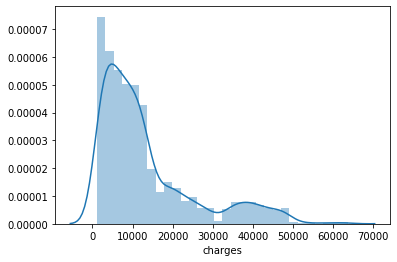

In [13]:
sns.distplot(data['charges'])  # Distribution of charges

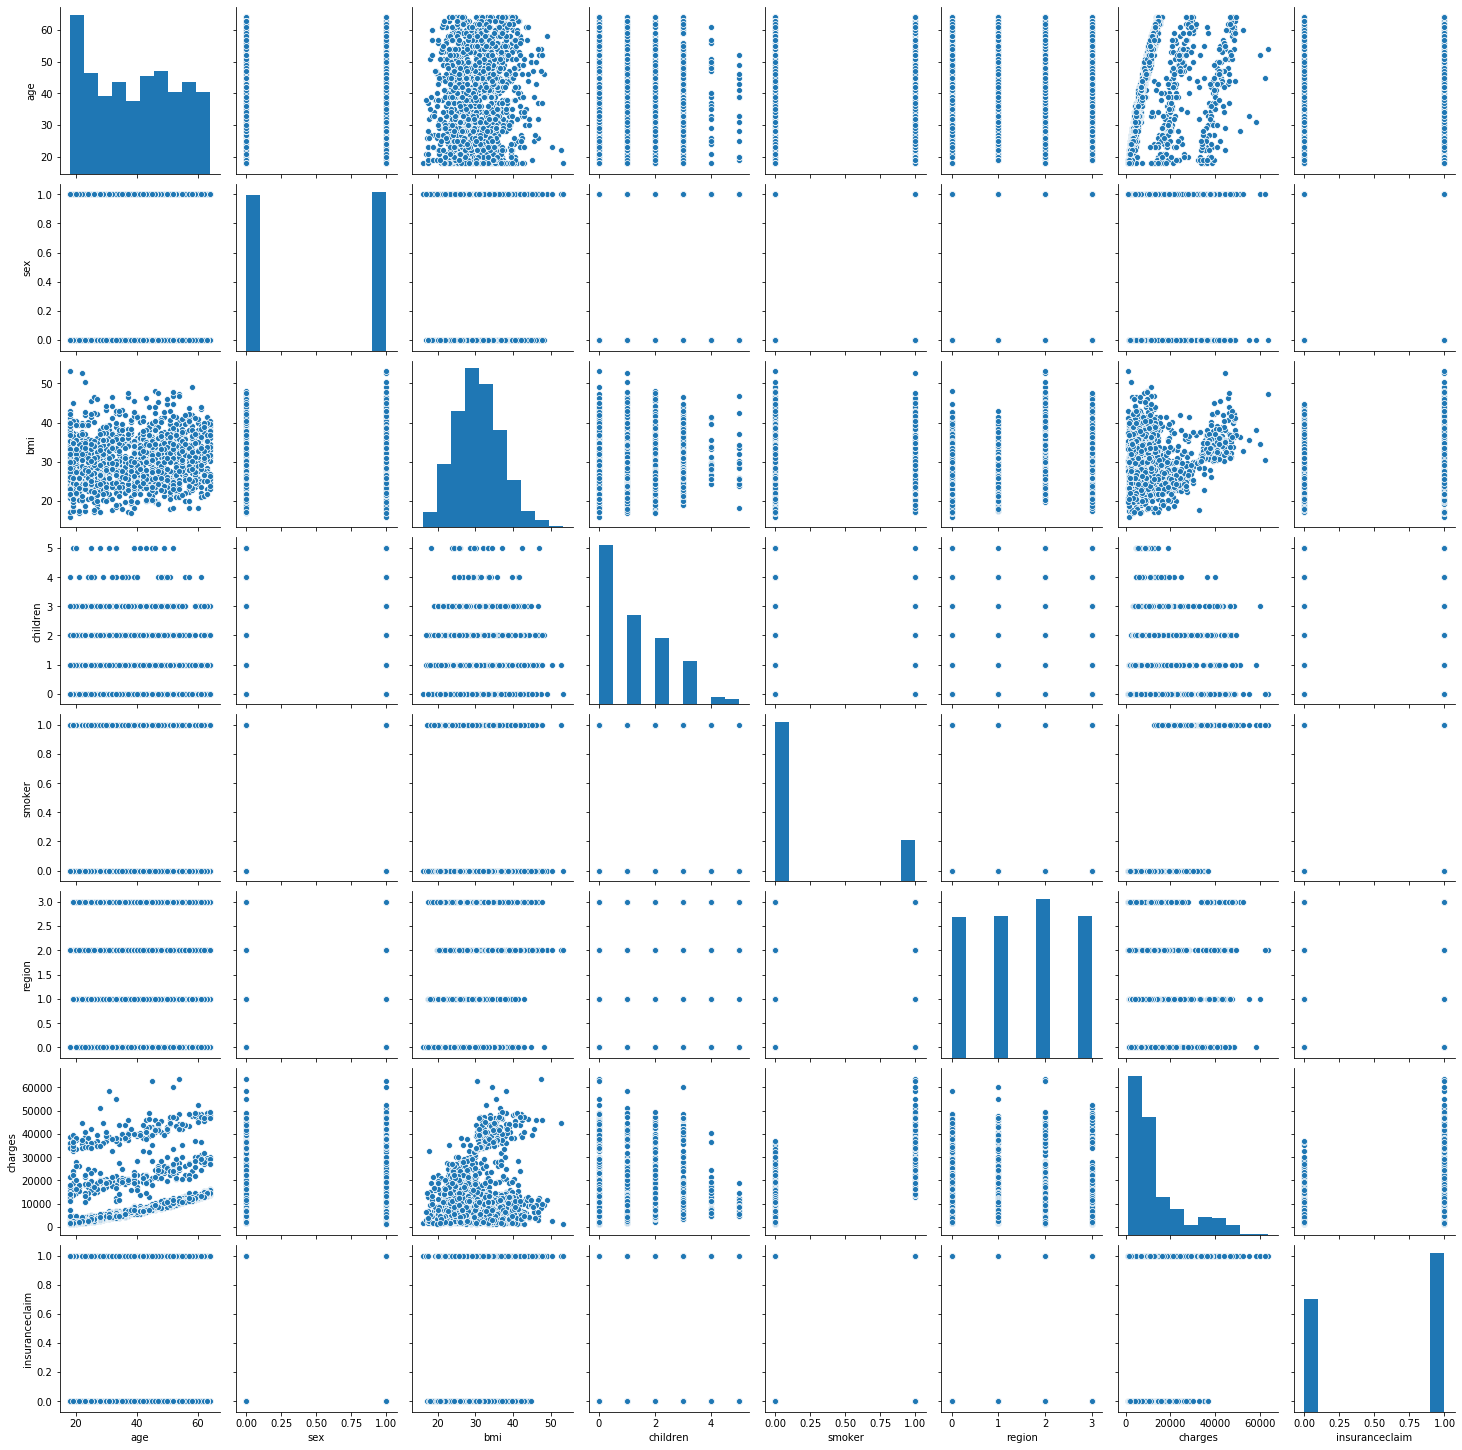

In [14]:
sns.pairplot(data)

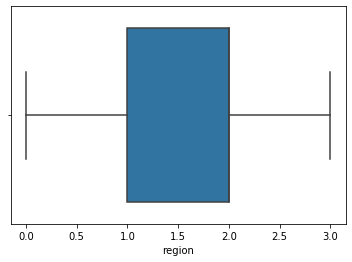

In [15]:
sns.boxplot(x=data['region'])

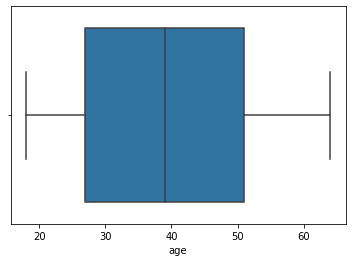

In [16]:
sns.boxplot(x=data['age'])

## Data Preparation

In [17]:
X = data.drop(columns=['insuranceclaim'])
Y = data['insuranceclaim']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [19]:
# for comapritive analysis
score = pd.DataFrame()

## XGBoost

In [20]:
model = XGBClassifier()

In [21]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
# make predictions for test data
y_pred = model.predict(X_test)

In [23]:
# evaluate predictions
acc= np.round(accuracy_score(y_test, y_pred)*100,0)
acc

99.0

In [24]:
f1= np.round(f1_score(y_test, y_pred)*100,0)
f1

99.0

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       182
           1       0.98      0.99      0.99       220

    accuracy                           0.99       402
   macro avg       0.99      0.98      0.98       402
weighted avg       0.99      0.99      0.99       402



In [26]:
score= score.append([["XGBoost", acc, f1]])

## Decision Trees

In [27]:
dt = DecisionTreeClassifier(max_depth=1, random_state=28)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=28)

In [28]:
y_pred= dt.predict(X_test)

In [29]:
acc= np.round(accuracy_score(y_pred,y_test)*100,2)
acc

69.65

In [30]:
f1= np.round(f1_score( y_pred, y_test,average="weighted")*100,2)
f1

71.86

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.43      0.56       182
           1       0.66      0.92      0.77       220

    accuracy                           0.70       402
   macro avg       0.74      0.67      0.66       402
weighted avg       0.73      0.70      0.67       402



In [32]:
score=score.append([['Decision Tree', acc, f1]])
score

,0,1,2
0,XGBoost,99.00,99.00
0,Decision Tree,69.65,71.86


## Support Vector Machines (SVMs)

In [33]:
# SVM model intialization and generating pipeline for scaling variable for svm model
svm = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel='linear'))])

In [34]:
svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(kernel='linear'))])

In [35]:
y_pred = svm.predict(X_test)

In [36]:
acc= np.round(accuracy_score(y_pred,y_test)*100,2)
acc

89.55

In [37]:
f1= np.round(f1_score(y_test, y_pred, average="weighted")*100,2)
f1

89.53

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       182
           1       0.89      0.92      0.91       220

    accuracy                           0.90       402
   macro avg       0.90      0.89      0.89       402
weighted avg       0.90      0.90      0.90       402



In [39]:
score=score.append([['SVM', acc, f1]])
score

,0,1,2
0,XGBoost,99.00,99.00
0,Decision Tree,69.65,71.86
0,SVM,89.55,89.53


## Naive Bayes

In [40]:
gnb = GaussianNB()

In [41]:
# fit
gnb.fit(X_train, y_train)

GaussianNB()

In [42]:
# predict
y_pred_2 = gnb.predict(X_test)

In [43]:
acc= np.round(accuracy_score(y_pred,y_test)*100,2)
acc

89.55

In [44]:
f1= np.round(f1_score(y_test, y_pred, average="weighted")*100,2)
f1

89.53

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       182
           1       0.89      0.92      0.91       220

    accuracy                           0.90       402
   macro avg       0.90      0.89      0.89       402
weighted avg       0.90      0.90      0.90       402



In [46]:
score=score.append([['Naive', acc, f1]])
score

,0,1,2
0,XGBoost,99.00,99.00
0,Decision Tree,69.65,71.86
0,SVM,89.55,89.53
0,Naive,89.55,89.53


## Comparision

In [47]:
score.columns=['Model',"Accuracy",'F1-Score']

In [48]:
score

,Model,Accuracy,F1-Score
0,XGBoost,99.00,99.00
0,Decision Tree,69.65,71.86
0,SVM,89.55,89.53
0,Naive,89.55,89.53


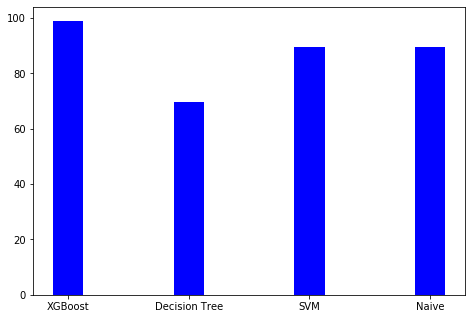

In [49]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(score['Model'],score['Accuracy'], color = 'b', width = 0.25)
plt.show()

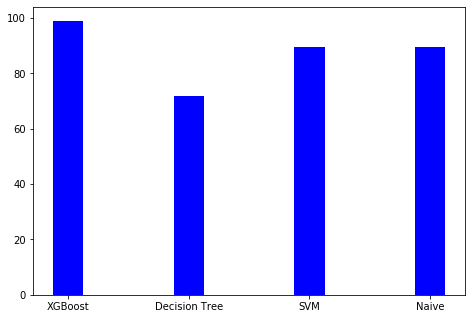

In [50]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(score['Model'],score['F1-Score'], color = 'b', width = 0.25)
plt.show()